In [191]:
from functions import *
from matplotlib import pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_events_from_table
from lifelines.plotting import add_at_risk_counts
from matplotlib.ticker import MaxNLocator

In [192]:
df_training = pd.read_csv("training_data.csv")

C:\Users\devas\AppData\Local\Temp\ipykernel_19992\3813615909.py:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_training = pd.read_csv("training_data.csv")


In [193]:
df_training = add_survival_time(df_training)
df_training = add_month_nums(df_training)
df_training = sort_by_mth_and_snapshot(df_training)
df_training = get_uniques(df_training)
df_training

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,survival_time,month_num,max_survival_time
337821,1.0,D,1,0,A,1.0,661-680,NaN,46,0.0,...,0.0,0.0,0.0,0.0,201801,201802,A,1,2,23
337841,1.0,D,1,0,A,1.0,661-680,NaN,81,1.0,...,0.0,0.0,0.0,0.0,201801,201802,B,1,2,23
337833,1.0,D,1,0,A,1.0,621-640,NaN,16,1.0,...,0.0,0.0,0.0,0.0,201801,201802,B,1,2,23
337832,1.0,D,1,0,A,1.0,<= 560,NaN,18,1.0,...,0.0,0.0,0.0,0.0,201801,201802,A,1,2,23
337952,1.0,R,0,0,A,1.0,721-740,NaN,162,1.0,...,0.0,0.0,0.0,0.0,201801,201802,B,1,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022381,1.0,P,0,0,A,1.0,761+,NaN,241,1.0,...,0.0,0.0,0.0,0.0,201812,201912,B,12,24,12
5415149,1.0,P,0,0,A,1.0,761+,NaN,28,1.0,...,0.0,0.0,0.0,0.0,201907,201912,C,5,24,5
2453303,0.0,P,1,0,A,1.0,761+,NaN,64,1.0,...,0.0,0.0,0.0,0.0,201806,201912,B,18,24,18
2453193,0.0,T,0,0,A,1.0,701-720,NaN,36,1.0,...,0.0,0.0,0.0,0.0,201806,201912,C,18,24,18


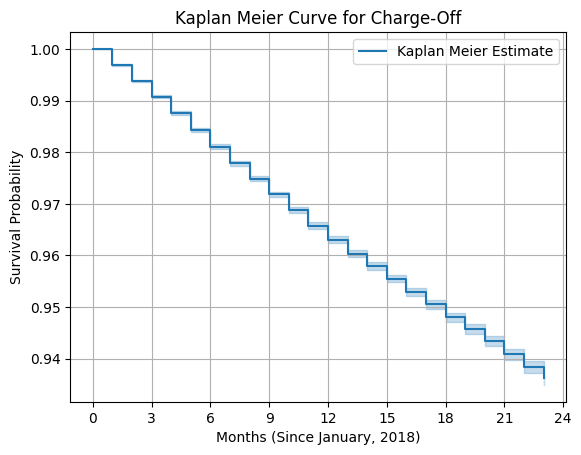

In [208]:
kmf = KaplanMeierFitter()
kmf.fit(df_training["survival_time"], df_training["charge_off"], label = "Kaplan Meier Estimate")
kmf.survival_function_
kmf.plot()
plt.xlabel("Months (Since January, 2018)")
plt.ylabel("Survival Probability")
plt.title("Kaplan Meier Curve for Charge-Off")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.grid()
plt.show()

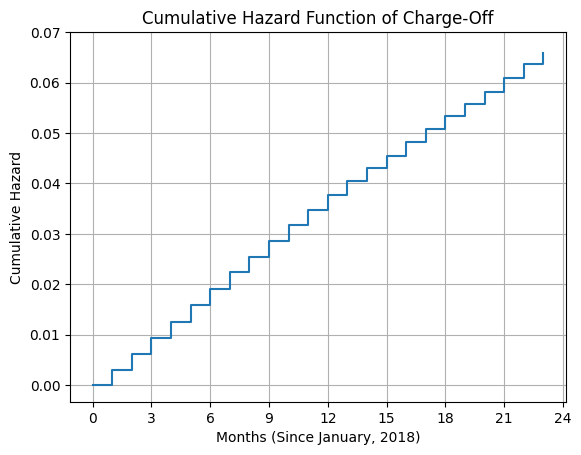

In [207]:
sf = kmf.survival_function_
chf = -np.log(sf)
plt.step(chf.index.values, chf.values, where="post")
plt.xticks(list(range(0, 26, 2)))
plt.yticks([0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07])
plt.xlabel("Months (Since January, 2018)")
plt.ylabel("Cumulative Hazard")
plt.title("Cumulative Hazard Function of Charge-Off")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.grid()
plt.show()

In [196]:
df_charge_offs = df_training[["mth_code", "charge_off"]].groupby("mth_code").agg("sum").reset_index()
df_charge_offs["cumulative_charge_off"] = df_charge_offs["charge_off"].cumsum()
df_charge_offs

,mth_code,charge_off,cumulative_charge_off
0,201802,78,78
1,201803,162,240
2,201804,206,446
3,201805,294,740
4,201806,362,1102
5,201807,373,1475
6,201808,431,1906
7,201809,476,2382
8,201810,617,2999
9,201811,695,3694


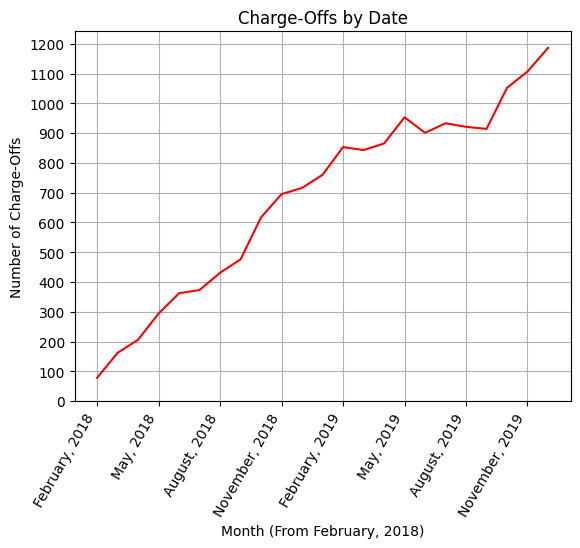

In [202]:
plt.plot(dates, df_charge_offs["charge_off"], color = 'r')

y_labels = list(range(0,1300,100))

plt.xticks(rotation=60, ha='right')
plt.yticks(y_labels)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
 
plt.xlabel('Month (From February, 2018)')
plt.ylabel('Number of Charge-Offs')
plt.title('Charge-Offs by Date')
plt.grid()
plt.show()

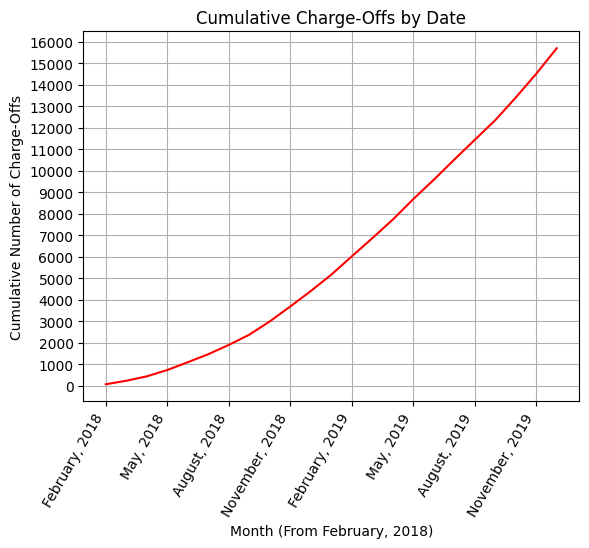

In [201]:
plt.plot(dates, df_charge_offs["cumulative_charge_off"], color = 'r')

y_labels = list(range(0,17000,1000))

plt.xticks(rotation=60, ha='right')
plt.yticks(y_labels)
 
plt.xlabel('Month (From February, 2018)')
plt.ylabel('Cumulative Number of Charge-Offs')
plt.title('Cumulative Charge-Offs by Date')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.grid()
plt.show()